In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [4]:
# zmienne niezależne - atrybuty
print(mnist.data.shape)
# Target - etykiety
print(mnist.target.shape)

(70000, 784)
(70000,)


In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_lbl, test_lbl = train_test_split(
 mnist.data, mnist.target, test_size=1/7.0, random_state=0)

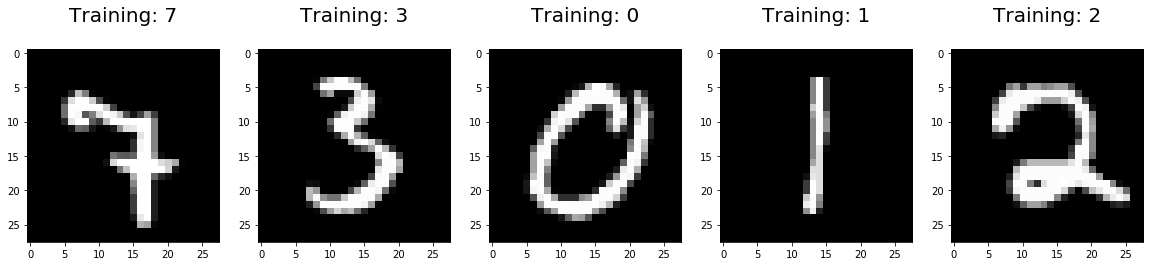

In [6]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_set[0:5], train_lbl[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %s\n' % label, fontsize = 20)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
# wszystkie parametry niewymienione w komendzie mają ustawione wartości domyślne (sprawdz w dokumentacji ich wartosci)
# Domyślny 'solver' jest baaardzo wolny w tym przypadku, dlatego został zmieniony
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [9]:
logisticRegr.fit(train_set, train_lbl)

c:\users\tulodzie\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
score = logisticRegr.score(test_set, test_lbl)
print(score)

0.9184


In [11]:
predictions = logisticRegr.predict(test_set)

In [12]:
test_set

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
 if label != predict: 
  misclassifiedIndexes.append(index)
  index +=1

In [14]:
misclass = test_lbl!=predictions

In [15]:
misclass = pd.Series(misclass)
misclass= misclass[misclass==True]
misclass.index

Int64Index([   4,    5,   18,   61,   78,   82,  134,  141,  161,  179,
            ...
            9895, 9905, 9909, 9922, 9936, 9941, 9943, 9955, 9962, 9988],
           dtype='int64', length=816)

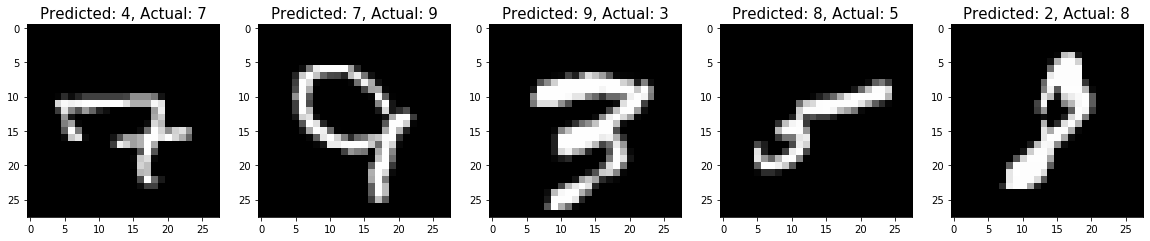

In [16]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclass.index[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_set[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)
##############

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)

[[ 968    0    1    1    2   10    8    2    4    0]
 [   0 1115    6    2    1    4    0    4    7    2]
 [   4   12  933   15   12    1   15    9   35    4]
 [   1    5   35  892    0   25    3   12   27   13]
 [   1    2    5    0  898    1   11   10    6   28]
 [   8    2    8   31    9  746   13    5   33    8]
 [   8    3    8    0   11   17  936    2    4    0]
 [   2    5   15    4   11    2    1  980    4   40]
 [   4   20   11   18    7   28    9    2  854   10]
 [   4    4    5   10   34    8    2   32    8  862]]


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [19]:
## Breat Cancer data
data = pd.read_csv('cancer.csv')

In [20]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
data.shape

(569, 33)

In [22]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [23]:
data[data['id'].duplicated()].id

Series([], Name: id, dtype: int64)

In [24]:
data["Unnamed: 32"].unique()

array([nan])

In [25]:
data.drop('id', axis=1, inplace=True)
data.drop('Unnamed: 32', axis=1, inplace=True)

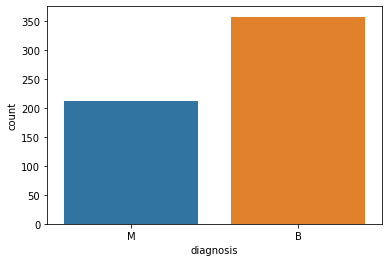

In [26]:
sns.countplot(data['diagnosis'])

In [27]:
data['diagnosis'] = data['diagnosis'].map({'M' : 1, 'B' : 0})

In [28]:
# Podzial danych na treningowe i testowe
train, test = train_test_split(data, test_size = 0.3)

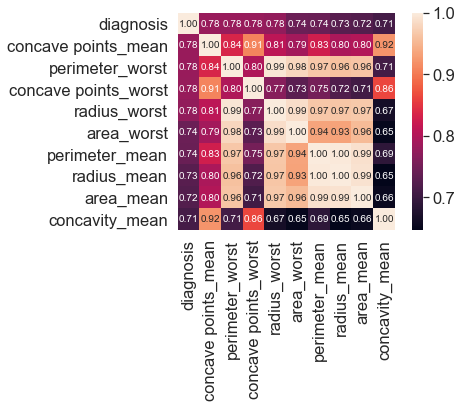

In [29]:
k = 10
corrmat = train.corr()
cols = corrmat.nlargest(k, 'diagnosis')['diagnosis'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

## Bivariate Analysis

In [30]:
features = [
    'diagnosis',
    'perimeter_se',
    'perimeter_worst',
    'concavity_worst',
    'concave points_worst',
    'texture_worst',
    'smoothness_worst',
    'symmetry_worst'
]

c:\users\tulodzie\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


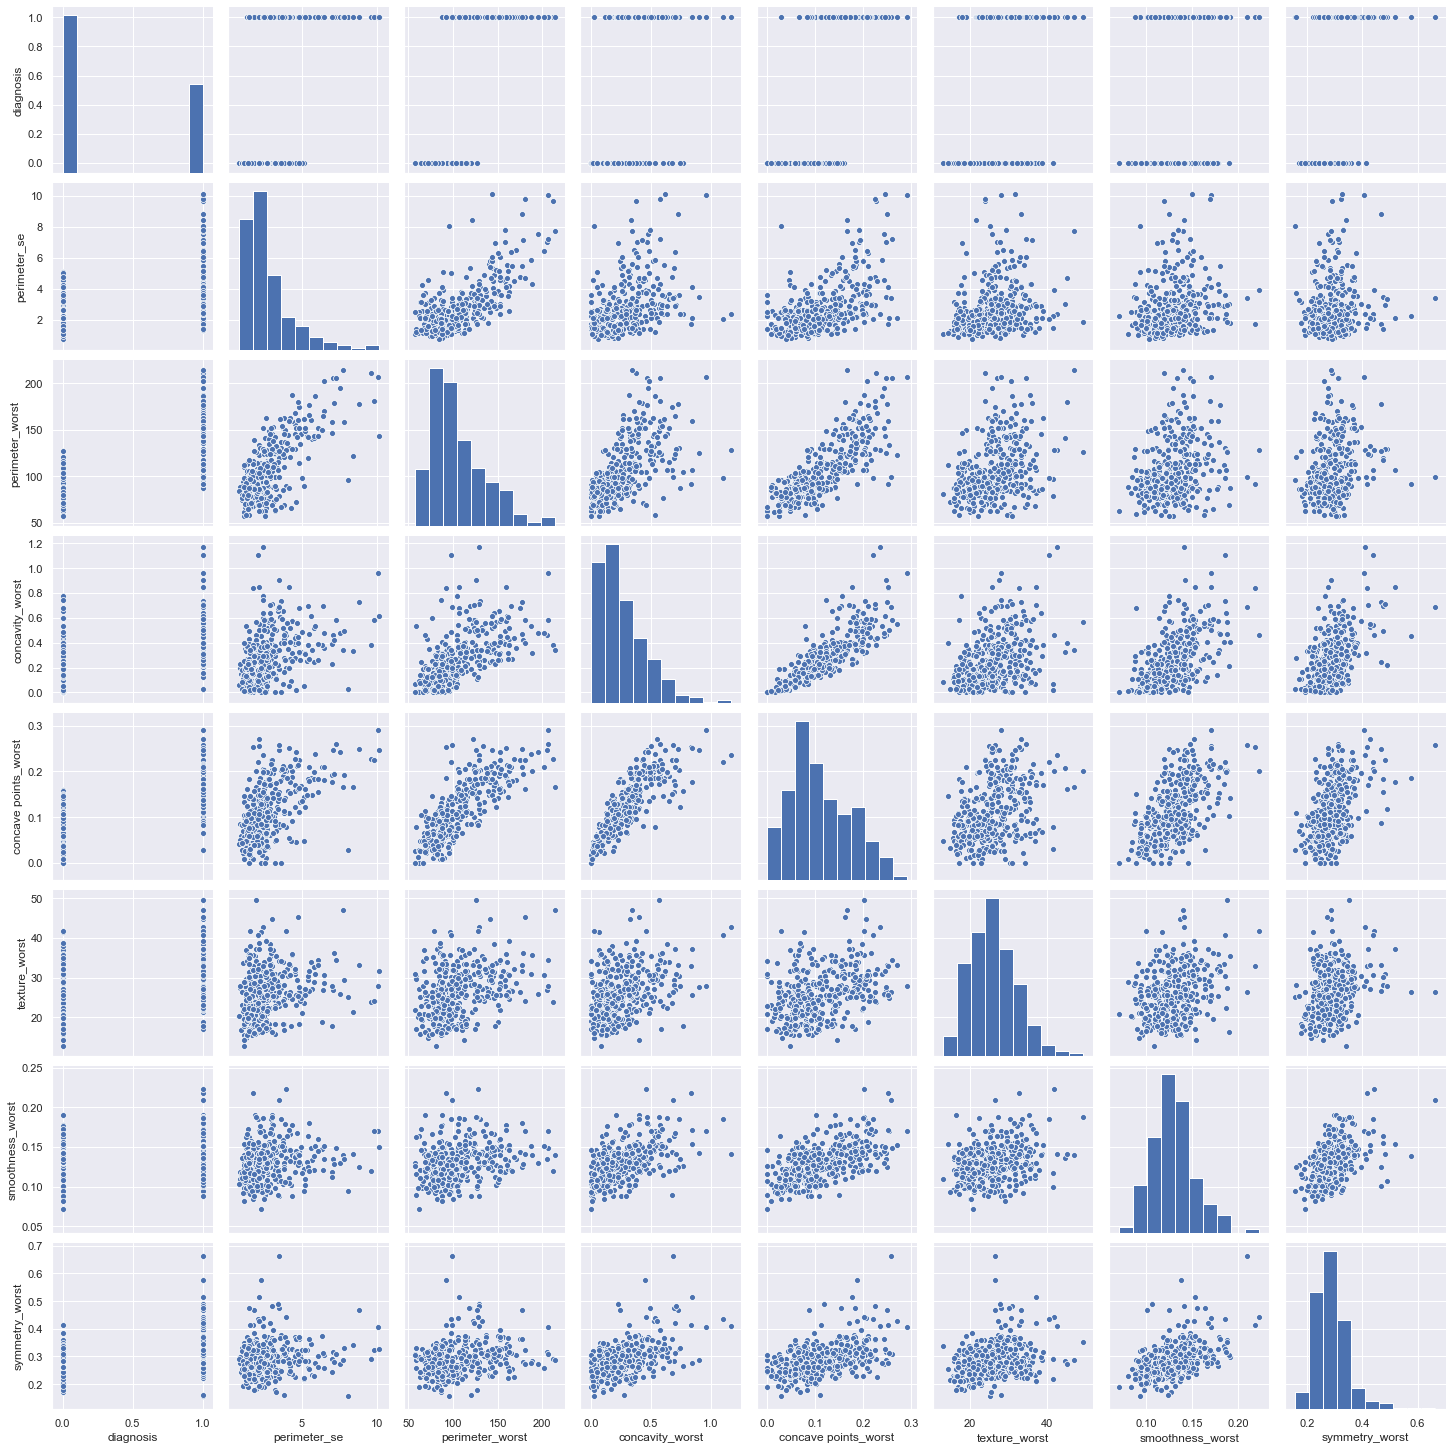

In [31]:
sns.set()
sns.pairplot(train[features], size = 2.5)
plt.show();

In [32]:
## Brakujące dane
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
fractal_dimension_worst,0,0.0
area_se,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0


## Univariate Analysis

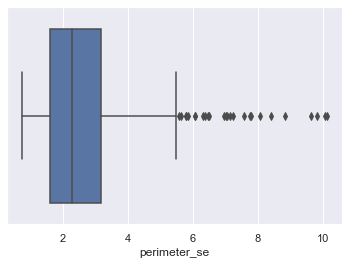

In [33]:
# zmienna: perimeter_se
sns.boxplot(train['perimeter_se'])

In [34]:
# usunięcie outliersów
train = train[train['perimeter_se'] < 15]

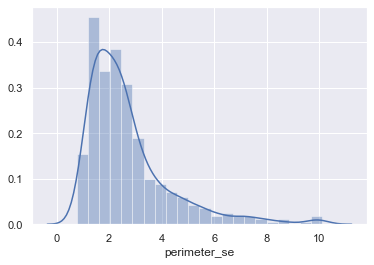

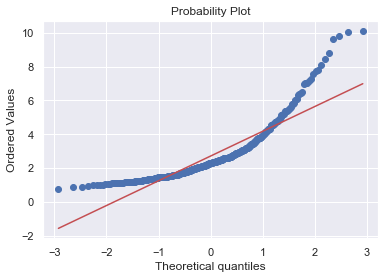

In [35]:
sns.distplot(train['perimeter_se'])
fig = plt.figure()
res = stats.probplot(train['perimeter_se'], plot=plt)

## Klasyfikator

In [36]:
predictors = features[2:]

train_X = train[predictors]
train_y = train.diagnosis

test_X = test[predictors]
test_y = test.diagnosis

In [37]:
model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
predictions = model.predict(test[predictors])
accuracy = metrics.accuracy_score(predictions, test['diagnosis'])
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 94.152%


In [39]:
metrics.roc_auc_score(predictions, test['diagnosis'])

0.9413030998851895

In [40]:
confusion_matrix(test['diagnosis'], predictions)

array([[98,  4],
       [ 6, 63]], dtype=int64)